# Place Cell Ratio

In [1]:
from typing import Tuple

import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from param import *
from utils.util import get_place_cell

output_dir = ParamDir().OUTPUT_ROOT/ "data_exploration/"

In [2]:
def get_place_cell_ratio(data_name):
    # print(data_name)
    with open(output_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)

    pc_beh_id, pc_event_id = get_place_cell(results_all, 0.001)
    return len(pc_beh_id)/len(results_all['original MI'])

Text(0.5, 0.98, 'place cell ratio')

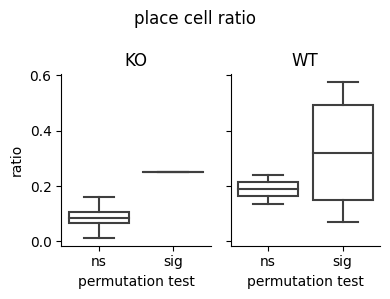

In [3]:
fig, axes = plt.subplots(figsize=(4,3), ncols=2, sharey=True, tight_layout=True)
sns.despine()

KO_ids = [1] # mice that passed the test
pass_res_KO = []
not_pass_res_KO = []
KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in str(data_dir).split('/')[-1]]
for mouse_id, data_dir in enumerate(KO_data_list):
    data_name = str(data_dir).split('/')[-1]
    ratio = get_place_cell_ratio(data_name)
    if mouse_id+1 not in KO_ids:
        not_pass_res_KO.append([ratio, data_name])
    else:
        pass_res_KO.append([ratio, data_name])

sns.boxplot([[i[0] for i in not_pass_res_KO], [i[0] for i in pass_res_KO]], 
            ax=axes[0],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
axes[0].set_xticklabels(["ns", "sig"])
axes[0].set_title("KO")
axes[0].set_xlabel("permutation test")

WT_ids = [1, 2, 4] # mice that didn't pass the test
pass_res_WT = []
not_pass_res_WT = []
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in str(data_dir).split('/')[-1]]
for mouse_id, data_dir in enumerate(WT_data_list):
    data_name = str(data_dir).split('/')[-1]
    ratio = get_place_cell_ratio(data_name)
    if mouse_id+1 in WT_ids:
        not_pass_res_WT.append([ratio, data_name])
    else:
        pass_res_WT.append([ratio, data_name])
sns.boxplot([[i[0] for i in not_pass_res_WT], [i[0] for i in pass_res_WT]],
            ax=axes[1],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
axes[1].set_xticklabels(["ns", "sig"])
axes[1].set_title("WT")
axes[1].set_xlabel("permutation test")

axes[0].set_ylabel("ratio")
plt.suptitle("place cell ratio")